In [107]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm
import matplotlib.colors
import cmocean
from matplotlib.gridspec import GridSpec
import os

import pandas as pd

Opening of a file

In [108]:
os.chdir('/Users/quentinlouis/phy571-birds-flocking/quentin/data')

In [109]:
#Retreiving the parameters of a computation :

file = open('speeds_big.txt', 'r')
line = file.readline()
#file_len_L = int(line[16])
#file_len_N = int(line[19])
#file_len_Eta = int(line[22])
#file_len_V = int(line[25])

#récupération de la liste L
file.readline()
line = file.readline()
line = line[1:-2].split(',')
#for i in range (len(line)):
    #line[i] = float(line[i])
L = np.asarray(line)

#récupération de la liste N
file.readline()
line = file.readline()
line = line[1:-2].split(',')
#for i in range (len(line)):
#    line[i] = float(line[i])
N = np.asarray(line)

#récupération de la liste Eta
file.readline()
line = file.readline()
line = line[1:-2].split(',')
#for i in range (len(line)):
#    print(line[i])
#    line[i] = float(line[i])
Eta = np.asarray(line)

#récupération de la liste V
file.readline()
line = file.readline()
line = line[1:-2].split(',')
#for i in range (len(line)):
#    line[i] = float(line[i])
V = np.asarray(line)

#récupération du nombre d'itérations calculées
file.readline()
line = file.readline()
line = line[1:-1] #à vérifier
#for i in range (len(line)):
#    line[i] = float(line[i])
nb_iter = int(line)

print(L)
print(N)
print(Eta)
print(V)
print(nb_iter)

['1' '5' '10' '15' '20' '30' '40' '50' '75' '100']
['10' '30' '50' '100' '300' '500']
['1e-05' '0.1' '0.2' '0.3' '0.4' '0.5' '0.75' '1.0']
['0.0003' '0.001' '0.003' '0.01' '0.03' '0.1' '0.3' '1.0']
100


In [110]:
avg_speed = np.loadtxt('speeds_big.txt')

avg_speed = avg_speed.reshape((len(L),len(N),len(Eta),len(V),nb_iter))

print(L)
print(N)
print(Eta)
print(V)

['1' '5' '10' '15' '20' '30' '40' '50' '75' '100']
['10' '30' '50' '100' '300' '500']
['1e-05' '0.1' '0.2' '0.3' '0.4' '0.5' '0.75' '1.0']
['0.0003' '0.001' '0.003' '0.01' '0.03' '0.1' '0.3' '1.0']


In [111]:
#print(avg_speed)

##### Aggregating data in a coherent manner, like in the Vicsek article

As a first approximation, we reject the `reject_nb` first values of `get_avg_speed()` (this value may vary after we plot data) and compute the **mean** and **std** of the remaining values.

Error bars on plots represent $5\sigma$. (plots are done in the plot_data.ipynb file)

First, we need to change the type of the arrays L,N,V,Eta from `strings` to `floats`.

In [112]:
new_L = []
for i in range(len(L)):
    value = float(L[i])
    new_L.append(int(value))
new_N = []
for i in range(len(N)):
    value = float(N[i])
    new_N.append(int(value))
new_Eta = []
for i in range(len(Eta)):
    new_Eta.append(float(Eta[i]))
new_V = []
for i in range(len(V)):
    new_V.append(float(V[i]))
new_V = np.asarray(new_V)

print(L)
print(N)
print(Eta)
print(V)
print(new_V)

['1' '5' '10' '15' '20' '30' '40' '50' '75' '100']
['10' '30' '50' '100' '300' '500']
['1e-05' '0.1' '0.2' '0.3' '0.4' '0.5' '0.75' '1.0']
['0.0003' '0.001' '0.003' '0.01' '0.03' '0.1' '0.3' '1.0']
[3.e-04 1.e-03 3.e-03 1.e-02 3.e-02 1.e-01 3.e-01 1.e+00]


In [113]:
mean_speed = np.zeros((len(new_L), len(new_N), len(new_Eta), len(new_V)))
std_speed = np.zeros((len(new_L), len(new_N), len(new_Eta), len(new_V)))

reject_nb = 50

for i in range(len(L)):
    V_new = new_V*new_L[i]
    #print(V_new)
    for j in range (len(N)):
        for k in range (len(Eta)):
            for l in  range (len(V_new)):
                #print(l)
                lst = avg_speed[i, j, k, l]
                lst = lst[reject_nb:]
                mean_speed[i,j,k,l] = np.mean(lst)
                std_speed[i,j,k,l] = np.std(lst)
                
#np.savetxt("mean_speed.csv", mean_speed, delimiter=",")
#np.savetxt("std_speed.csv", mean_speed, delimiter=",")

#print(mean_speed)
#print(std_speed)

##### Plotting the results of a computation

In [115]:
os.chdir('/Users/quentinlouis/phy571-birds-flocking/quentin/data/images')

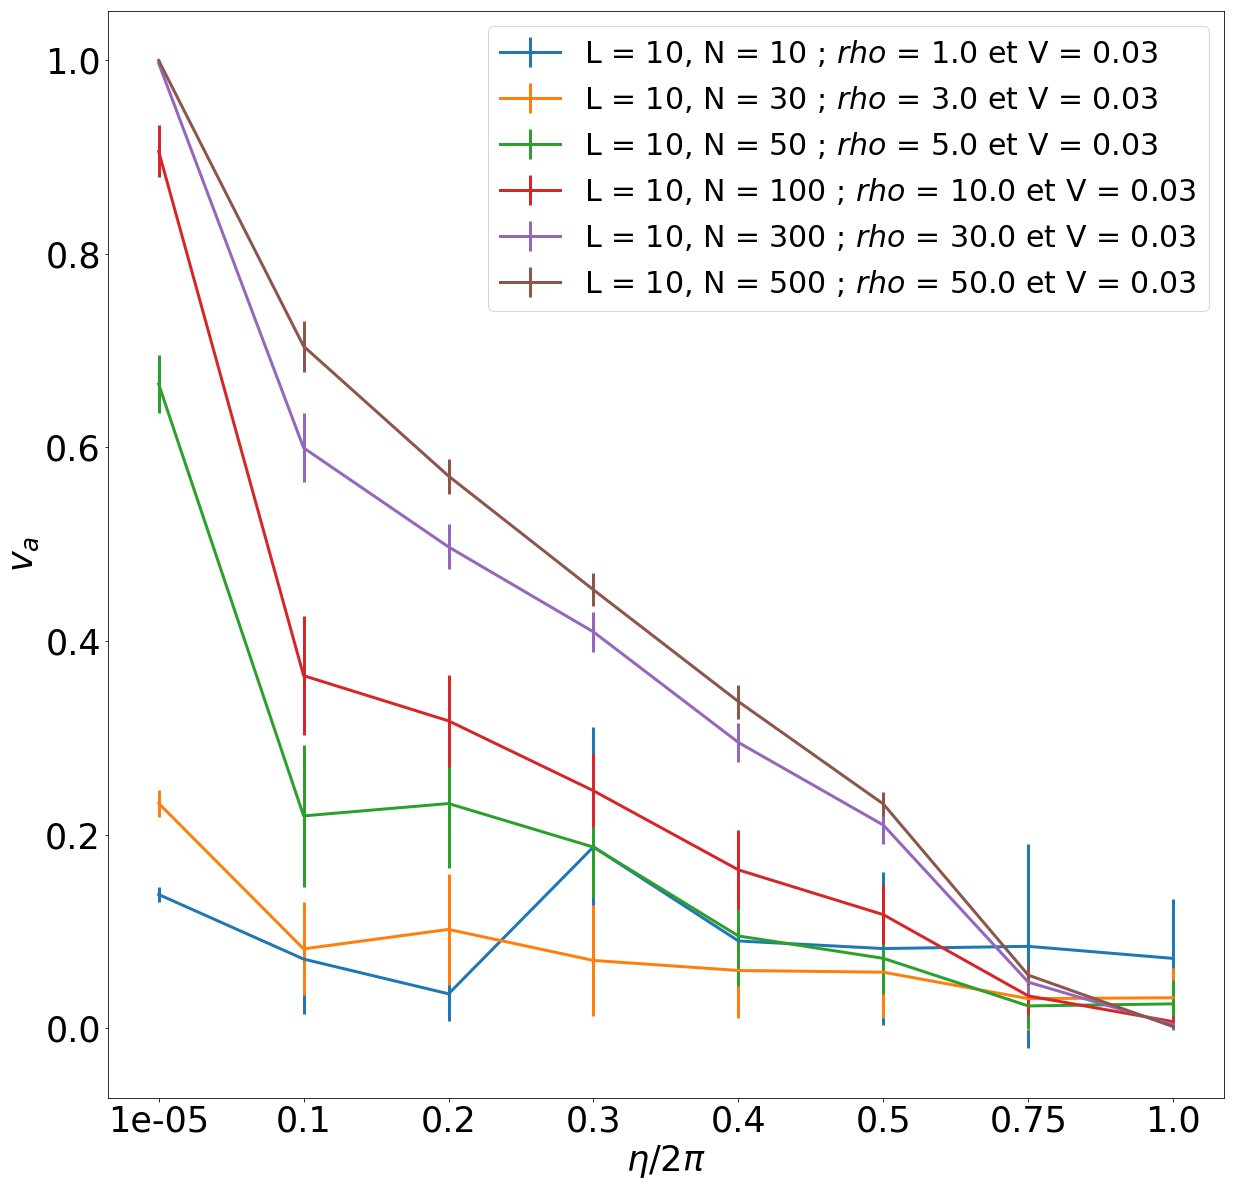

In [104]:
plt.rcParams.update({'font.size': 35})

plt.figure(figsize=(20,20))
for i in range(len(L)):
    V_new = new_V*new_L[i]
    #i=1
    for j in range (len(N)):
        #j=3
        for l in  range (len(V)):
            #l = 2
            if (l == 2 and i == 2):
                name = "L = " + str(new_L[i]) + \
                                 ", N = " + str(new_N[j]) + " ; $rho$ = " + \
                                 str(new_N[j]/(new_L[i] + 0.0)) +
                                    " et V = " + str(V_new[l])
                plt.errorbar(Eta, mean_speed[i,j,:,l], yerr=std_speed[i,j,:,l], \
                                label=name, lw=3)

plt.xlabel('$\eta/2\pi$')
plt.ylabel('$v_a$')
plt.legend(loc=1, prop={'size': 30})
plt.show()

---

Plot par $\rho$ différent, pour différentes valeurs de $\eta$

In [140]:
lst_rhos = []
for i in range(len(L)):
    V_new = new_V*new_L[i]
    for j in range (len(N)):
        rho = new_N[j]/(new_L[i] + 0.0)
        if (rho not in lst_rhos):
            lst_rhos.append(np.around(rho,1))

lst_rhos = np.sort(lst_rhos)
print(lst_rhos)

[1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01 7.00e-01
 8.00e-01 1.00e+00 1.20e+00 1.30e+00 1.50e+00 1.70e+00 2.00e+00 2.50e+00
 3.00e+00 3.30e+00 3.30e+00 4.00e+00 5.00e+00 6.00e+00 6.70e+00 6.70e+00
 7.50e+00 1.00e+01 1.25e+01 1.50e+01 1.67e+01 2.00e+01 2.50e+01 3.00e+01
 3.33e+01 5.00e+01 6.00e+01 1.00e+02 3.00e+02 5.00e+02]


In [141]:
plt.rcParams.update({'font.size': 35})

for a in range(len(lst_rhos)):
    plt.figure(figsize=(20,20))
    for i in range(len(L)):
        V_new = new_V*new_L[i]
        #i=1
        for j in range (len(N)):
            #j=3
            for l in  range (len(V)):
                #l = 2
                if (np.around(new_N[j]/(new_L[i] + 0.0), 1) == lst_rhos[a]):
                    name = "L = " + str(new_L[i]) + \
                                     ", N = " + str(new_N[j]) + " ; $rho$ = " + \
                                     str(lst_rhos[a]) + \
                                        " et V = " + str(np.around(V_new[l],2))
                    plt.errorbar(Eta, mean_speed[i,j,:,l], yerr=std_speed[i,j,:,l], \
                                    label=name, lw=3)

    plt.xlabel('$\eta/2\pi$')
    plt.ylabel('$v_a$')
    plt.ylim(0,1)
    plt.legend(loc=1, prop={'size': 12})
    plt.savefig('rho/speeds_big_rho_' + str(lst_rhos[a]) + '.png', bbox_inches='tight')
#plt.show()
plt.close("all")

---

Plot par $\eta$ différent, pour différentes valeurs de $\rho$

In [149]:
lst_rhos = []
for i in range(len(L)):
    V_new = new_V*new_L[i]
    for j in range (len(N)):
        rho = new_N[j]/(new_L[i] + 0.0)
        if (rho not in lst_rhos):
            lst_rhos.append(np.around(rho,1))

lst_rhos = np.sort(lst_rhos)
print(lst_rhos)

[1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01 7.00e-01
 8.00e-01 1.00e+00 1.20e+00 1.30e+00 1.50e+00 1.70e+00 2.00e+00 2.50e+00
 3.00e+00 3.30e+00 3.30e+00 4.00e+00 5.00e+00 6.00e+00 6.70e+00 6.70e+00
 7.50e+00 1.00e+01 1.25e+01 1.50e+01 1.67e+01 2.00e+01 2.50e+01 3.00e+01
 3.33e+01 5.00e+01 6.00e+01 1.00e+02 3.00e+02 5.00e+02]


In [155]:
lst_indices = [[] for rho in lst_rhos]
for i in range(len(L)):
    V_new = new_V*new_L[i]
    for j in range (len(N)):
        rho = np.around(new_N[j]/(new_L[i] + 0.0),1)
        idx = list(lst_rhos).index(rho)
        lst_indices[idx].append([i,j])

In [156]:
print(lst_indices)

[[[8, 0], [9, 0]], [[6, 0], [7, 0]], [[5, 0], [9, 1]], [[8, 1]], [[4, 0], [9, 2]], [[7, 1]], [[3, 0], [8, 2]], [], [[6, 1]], [[2, 0], [5, 1], [7, 2], [9, 3]], [[6, 2]], [[8, 3]], [[4, 1]], [[5, 2]], [[1, 0], [3, 1], [7, 3]], [[4, 2], [6, 3]], [[2, 1], [9, 4]], [[3, 2], [5, 3]], [], [[8, 4]], [[2, 2], [4, 3], [9, 5]], [[1, 1], [7, 4]], [[3, 3], [8, 5]], [], [[6, 4]], [[0, 0], [1, 2], [2, 3], [5, 4], [7, 5]], [[6, 5]], [[4, 4]], [[5, 5]], [[1, 3], [3, 4]], [[4, 5]], [[0, 1], [2, 4]], [[3, 5]], [[0, 2], [2, 5]], [[1, 4]], [[0, 3], [1, 5]], [[0, 4]], [[0, 5]]]


In [173]:
plt.rcParams.update({'font.size': 35})

for eta in range(len(Eta)):
    plt.figure(figsize=(20,20))
    mean_speed_to_plot = [[] for rho in lst_rhos]
    std_speed_to_plot = [[] for rho in lst_rhos]
    for i in range(len(lst_indices)):
        for idx in lst_indices[i]:
            for l in  range (len(V)):
                mean_speed_to_plot[i].append(mean_speed[idx[0],idx[1],eta,l])
                std_speed_to_plot[i].append(std_speed[idx[0],idx[1],eta,l])
    """name = "L = " + str(new_L[idx[0]]) + \
                     ", N = " + str(new_N[idx[1]]) + " ; $rho$ = " + \
                     str(np.around(new_N[idx[0]]/(new_L[idx[1]] + 0.0),1)) + \
                        " et V = " + str(np.around(V_new[l],2))"""
    #mean_speed_to_plot = np.asarray(mean_speed_to_plot)
    #std_speed_to_plot = np.asarray(std_speed_to_plot)
    print(len(mean_speed_to_plot))
    print(len(lst_rhos))
    for i in range (len(lst_rhos)):
        t = [lst_rhos[i] for j in range(len(mean_speed_to_plot[i]))]
        print(t)
        plt.errorbar(t, mean_speed_to_plot[i], yerr=std_speed_to_plot[i])#, lw=3) #label=name, lw=3)

    plt.xlabel('$rho$')
    plt.ylabel('$v_a$')
    plt.ylim(0,1)
    plt.xlim(0,100)
    #plt.legend(loc=1, prop={'size': 12})
    plt.savefig('eta/speeds_big_eta_' + str(eta) + '.png', bbox_inches='tight')
#plt.show()
plt.close("all")

38
38
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
[]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
[1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3]
[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
[1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.5, 2.5, 2.5, 2

---

Plot par configuration, afin de quantifier l'importance de $v$.

In [148]:
plt.rcParams.update({'font.size': 35})


for i in range(len(L)):
    V_new = new_V*new_L[i]
    for j in range (len(N)):
        plt.figure(figsize=(20,20))
            #if (l == 2 and i == 2):
        for l in  range (len(V)):
            name = "L = " + str(new_L[i]) + \
                         ", N = " + str(new_N[j]) + " ; $rho$ = " + \
                         str(np.around(new_N[j]/(new_L[i] + 0.0),1)) + \
                            " et V = " + str(V_new[l])
            plt.errorbar(Eta, mean_speed[i,j,:,l], yerr=std_speed[i,j,:,l], \
                        label=name, lw=3)
        plt.xlabel('$\eta/2\pi$')
        plt.ylabel('$v_a$')
        plt.ylim(0,1)
        plt.legend(loc=1, prop={'size': 12})
        plt.savefig('v/speeds_big_L_' + str(new_L[i])+ '_N_' + str(new_N[j]) + '.png', bbox_inches='tight')
        plt.close()
#plt.show()
plt.close("all")